# Ensemble Learning and Random Forest

### Ensemble Model

A single algorithm may not make the perfect prediction for a given dataset. Machine learning algorithms have their limitations and producing a model with high accuracy is challenging. If we build and combine multiple models, the overall accuracy could get boosted. Ensemble models is a machine learning approach to combine multiple other models in the prediction process. Those models are referred to as base estimators. It is a solution to overcome the following technical challenges of building a single estimator:

* High variance: The model is very sensitive to the provided inputs to the learned features.
* Low accuracy: One model or one algorithm to fit the entire training data might not be good enough to meet expectations.
* Features noise and bias: The model relies heavily on one or a few features while making a prediction.

There are many ensemble learning algorithms, such as bagging, random forest, stacking, boosting and so on.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/05/Screenshot-from-2018-05-08-13-11-49-850x642.png" width="450" height="300"/>


### Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks. It uses subset of training samples as well as subset of features to build multiple split trees. Multiple decision trees are built to fit each training set. The distribution of samples/features is typically implemented in a random mode.

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" width="550" height="360"/>

### Bagging
Another esemble learning method is bagging. Bagging is based on a bootstrapping sampling technique. Bootstrapping creates multiple sets of the original training data with replacement. Replacement enables the duplication of sample instances in a set. Each subset has the same equal size and can be used to train models in parallel.

### Difference between random forest and bagging
The key difference between bagging and random forest is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

# My Implementation on Haberman's Survival Dataset

I choose Haberman's Survival dataset to implement ensemble learning and random forest. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. The dataset has 3 predictor variables and 1 target variable.

### Predictor variables:
1. Age: age of patient at time of operation (numerical)
2. Op_year: patient's year of operation (year - 1900, numerical)
3. Anxil_nodes: number of positive axillary nodes detected (numerical)

### Target variable
1. Survival status (class attribute)
 * 1 = the patient survived 5 years or longer
 * 2 = the patient died within 5 year
 
Our goal is to use random forest, MLP, logistic regression and ensemble learning to predict whether the patient survived 5 years or longer.


In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Read the Haberman's Survival dataset.

In [2]:
df = pd.read_csv('haberman.csv')

Take a look at the first five rows of the dataset.

In [3]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


We notice that the column names are not properly shown, so we assign the proper column names based on the online dataset description. The four columns are "Age", "Op_year", "Axil_nodes" and "Surv_status" respectively.

In [4]:
df = df.rename(columns = {'30':'Age', '64':'Op_year', '1':'Axil_nodes', '1.1':'Surv_status'})

Again, take a look at the first few rows of the dataset.

In [5]:
df.head()

,Age,Op_year,Axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Generate pair plots.

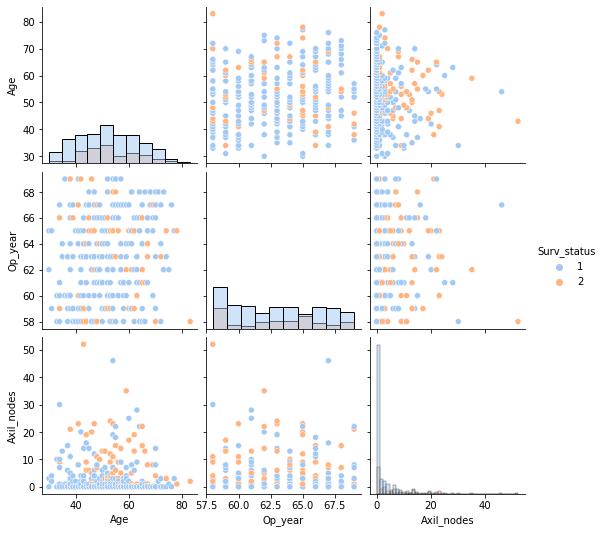

In [6]:
sns.pairplot(df, hue = 'Surv_status', diag_kind = 'hist', palette = "pastel")

Select two variables "Age" and "Axil_nodes" to study.

In [25]:
X = df[["Age", "Axil_nodes"]].to_numpy()
y = df['Surv_status']

In [26]:
X[0:10]

array([[30,  3],
       [30,  0],
       [31,  2],
       [31,  4],
       [33, 10],
       [33,  0],
       [34,  0],
       [34,  9],
       [34, 30],
       [34,  1]])

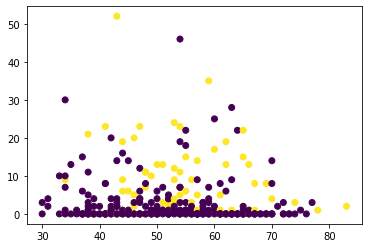

In [27]:
plt.scatter(X[:, 0], X[:, 1], c = y)

### Split the data into a training set and a test set

Import "train_test_split" from "sklearn.model_selection", and then split X and y into a training set and a test set.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Ensemble Learning

Import necessary libraries for fitting models: "RandomForestClassifier", "VotingClassifier", "LogisticRegression", and "MLPClassifier".

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

Now fit the model using logistic regression, MLP, and random forest, and then combine these models using "VotingClassifier".

In [30]:
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()
voting_clf = VotingClassifier([('lr', log_clf),
                               ('mlp', mlp_clf),
                               ('rf', rand_clf)], voting = 'hard')

In [31]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

### Result

Display the accuracy score of each algorithm.

In [32]:
from sklearn.metrics import accuracy_score
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')

LogisticRegression, accuracy score = 0.7792207792207793
MLPClassifier, accuracy score = 0.8051948051948052
RandomForestClassifier, accuracy score = 0.8051948051948052
VotingClassifier, accuracy score = 0.8181818181818182


We see that "VotingClassifier" has the highest accuracy score, followed by "MLPClassifier" and Random Forest. Finally, Logistic Regression has the poorest performance, but it is still acceptable.

### Bagging

for bagging, we train each learner on a radnom subset of the training data (with replacing).

Import necessary libraries.

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Fit the model, set "n_estimators" to 300 and "max_samples" to 100.

In [34]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators = 300,
                            max_samples = 100,
                            bootstrap = True,
                            n_jobs = -1)

In [35]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=300, n_jobs=-1)

In [36]:
y_pred = bag_clf.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.8051948051948052

The "BaggingClassifier" has a relatively good accuracy score.

# References

Ensemble Models. Toward Data Science. https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c

Random forest. Wikipedia. https://en.wikipedia.org/wiki/Random_forest